In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline

## Learning about the data

In [57]:
train = pd.read_csv("train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78317 entries, 0 to 78316
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          78317 non-null  int64  
 1   Unnamed: 0            78317 non-null  int64  
 2   longitude             78317 non-null  float64
 3   latitude              78317 non-null  float64
 4   COLLISIONTYPE         78317 non-null  object 
 5   PERSONCOUNT           78317 non-null  int64  
 6   PEDCOUNT              78317 non-null  int64  
 7   PEDCYLCOUNT           78317 non-null  int64  
 8   VEHCOUNT              78317 non-null  int64  
 9   INJURIES              78317 non-null  int64  
 10  SERIOUSINJURIES       78317 non-null  int64  
 11  FATALITIES            78317 non-null  int64  
 12  JUNCTIONTYPE          78317 non-null  object 
 13  INATTENTIONIND        78317 non-null  bool   
 14  UNDERINFL             78317 non-null  bool   
 15  WEATHER            

In [58]:
train.sample(5)

,Unnamed: 0.1,Unnamed: 0,longitude,latitude,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5,SEVERITYCODE
60851,29111,29112,-122.340812,47.609618,Parked Car,5,0,0,2,0,...,NaN,7.16,0.25,0.0,0.0,46.0,53,39,25.1,0
34495,39123,39124,-122.314201,47.670178,Parked Car,3,0,0,2,0,...,NaN,3.58,0.60,0.0,0.0,63.0,67,59,25.1,0
70123,4749,4750,-122.280852,47.521979,Rear Ended,4,0,0,2,1,...,NaN,6.04,0.00,NaN,NaN,61.0,67,55,15.0,1
22749,39760,39761,-122.351105,47.623275,Left Turn,4,0,0,2,4,...,NaN,6.26,0.12,0.0,0.0,53.5,60,47,17.9,1
65780,14831,14832,-122.330539,47.610985,Angles,2,0,0,2,1,...,NaN,4.70,0.16,NaN,NaN,36.0,39,33,16.1,1


In [59]:
train.isnull().sum()

Unnamed: 0.1                0
Unnamed: 0                  0
longitude                   0
latitude                    0
COLLISIONTYPE               0
PERSONCOUNT                 0
PEDCOUNT                    0
PEDCYLCOUNT                 0
VEHCOUNT                    0
INJURIES                    0
SERIOUSINJURIES             0
FATALITIES                  0
JUNCTIONTYPE                0
INATTENTIONIND              0
UNDERINFL                   0
WEATHER                     0
ROADCOND                    0
LIGHTCOND                   0
SPEEDING                    0
HITPARKEDCAR                0
SPDCASENO                   0
DATE                        0
TIME                        0
intersection_related        0
response_type           67746
response_time           67746
AWND                        0
PRCP                        0
SNOW                    19033
SNWD                    19033
TAVG                        0
TMAX                        0
TMIN                        0
WSF5      

In [60]:
train.shape

(78317, 35)

In [61]:
train.describe()

,Unnamed: 0.1,Unnamed: 0,longitude,latitude,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,...,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5,SEVERITYCODE
count,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,78317.000000,...,10571.000000,78317.000000,78317.000000,59284.000000,59284.000000,78317.000000,78317.000000,78317.000000,77398.000000,78317.000000
mean,55937.911169,55938.911169,-122.335219,47.618673,2.721108,0.057025,0.041792,2.038191,0.478134,0.017902,...,8.738341,7.612382,0.128585,0.015112,0.020188,53.500147,61.159429,46.355351,21.532839,0.377223
std,32339.800864,32339.800864,0.027601,0.055520,1.347584,0.243757,0.201956,0.556465,0.778200,0.141718,...,12.448799,3.061248,0.268067,0.205799,0.255305,10.528537,13.041340,8.938734,7.560416,0.527969
min,0.000000,1.000000,-122.419544,47.495058,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.450000,0.000000,0.000000,0.000000,20.000000,25.000000,14.000000,6.000000,0.000000
25%,27856.000000,27857.000000,-122.351881,47.576514,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,1.000000,5.370000,0.000000,0.000000,0.000000,45.500000,51.000000,40.000000,16.100000,0.000000
50%,55801.000000,55802.000000,-122.335480,47.614600,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,3.000000,7.160000,0.000000,0.000000,0.000000,53.000000,60.000000,47.000000,19.900000,0.000000
75%,84032.000000,84033.000000,-122.317275,47.662823,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,11.000000,9.400000,0.140000,0.000000,0.000000,62.000000,71.000000,53.000000,25.100000,1.000000
max,111881.000000,111882.000000,-122.251965,47.734185,47.000000,6.000000,2.000000,15.000000,15.000000,5.000000,...,60.000000,21.250000,3.250000,6.800000,7.100000,87.000000,103.000000,71.000000,68.900000,3.000000


### Observation:
* The data has 5227 rows and 34 columns
* Label is: SEVERITYCODE
* response_time, response_type, SNOW, SNWD have significant number of null values
* Columns Unnamed: 0.1 and Unnamed: 0 have no significance

### Insights:
* The columns Unnamed: 0.1, Unnamed: 0, longitude, latitiude, TIME, SPDCASENO, DATE will note have a big role in predicting the severity of accident

### Action:
* We will remove the columns with a lot of null values
* We will remove the columns which won't be useful in predicting the severity
* Convert the boolean columns to integer for analysis

In [62]:
drop_column = ["Unnamed: 0.1", "Unnamed: 0", "longitude", "latitude", "TIME", 'response_time', "SPDCASENO", "DATE", 'response_type', 'SNOW', 'SNWD', 'WSF5']
train = train.drop(drop_column, axis = 1)

In [63]:
null_mask = train.isnull().any(axis=1)
null_rows = train[null_mask]
train = train.drop(null_rows.index)

In [64]:
train.sample(5)

,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,INATTENTIONIND,...,LIGHTCOND,SPEEDING,HITPARKEDCAR,intersection_related,AWND,PRCP,TAVG,TMAX,TMIN,SEVERITYCODE
8639,Angles,3,0,0,2,2,0,0,At Intersection,False,...,3,False,False,True,4.47,0.00,60.0,72,48,1
34821,Rear Ended,4,0,0,2,1,0,0,Mid-Block,True,...,3,False,False,False,9.62,0.12,48.0,52,45,1
16318,Rear Ended,3,0,0,2,0,0,0,Mid-Block,False,...,3,True,False,False,5.82,0.00,54.0,62,46,0
19003,Pedestrian,2,1,0,1,0,0,0,At Intersection,False,...,3,False,False,True,9.17,0.00,51.5,58,45,0
25150,Left Turn,2,0,0,2,0,0,0,At Intersection,False,...,3,False,False,True,3.58,0.00,61.5,68,55,0


## Univariate Exploratory Data Analysis

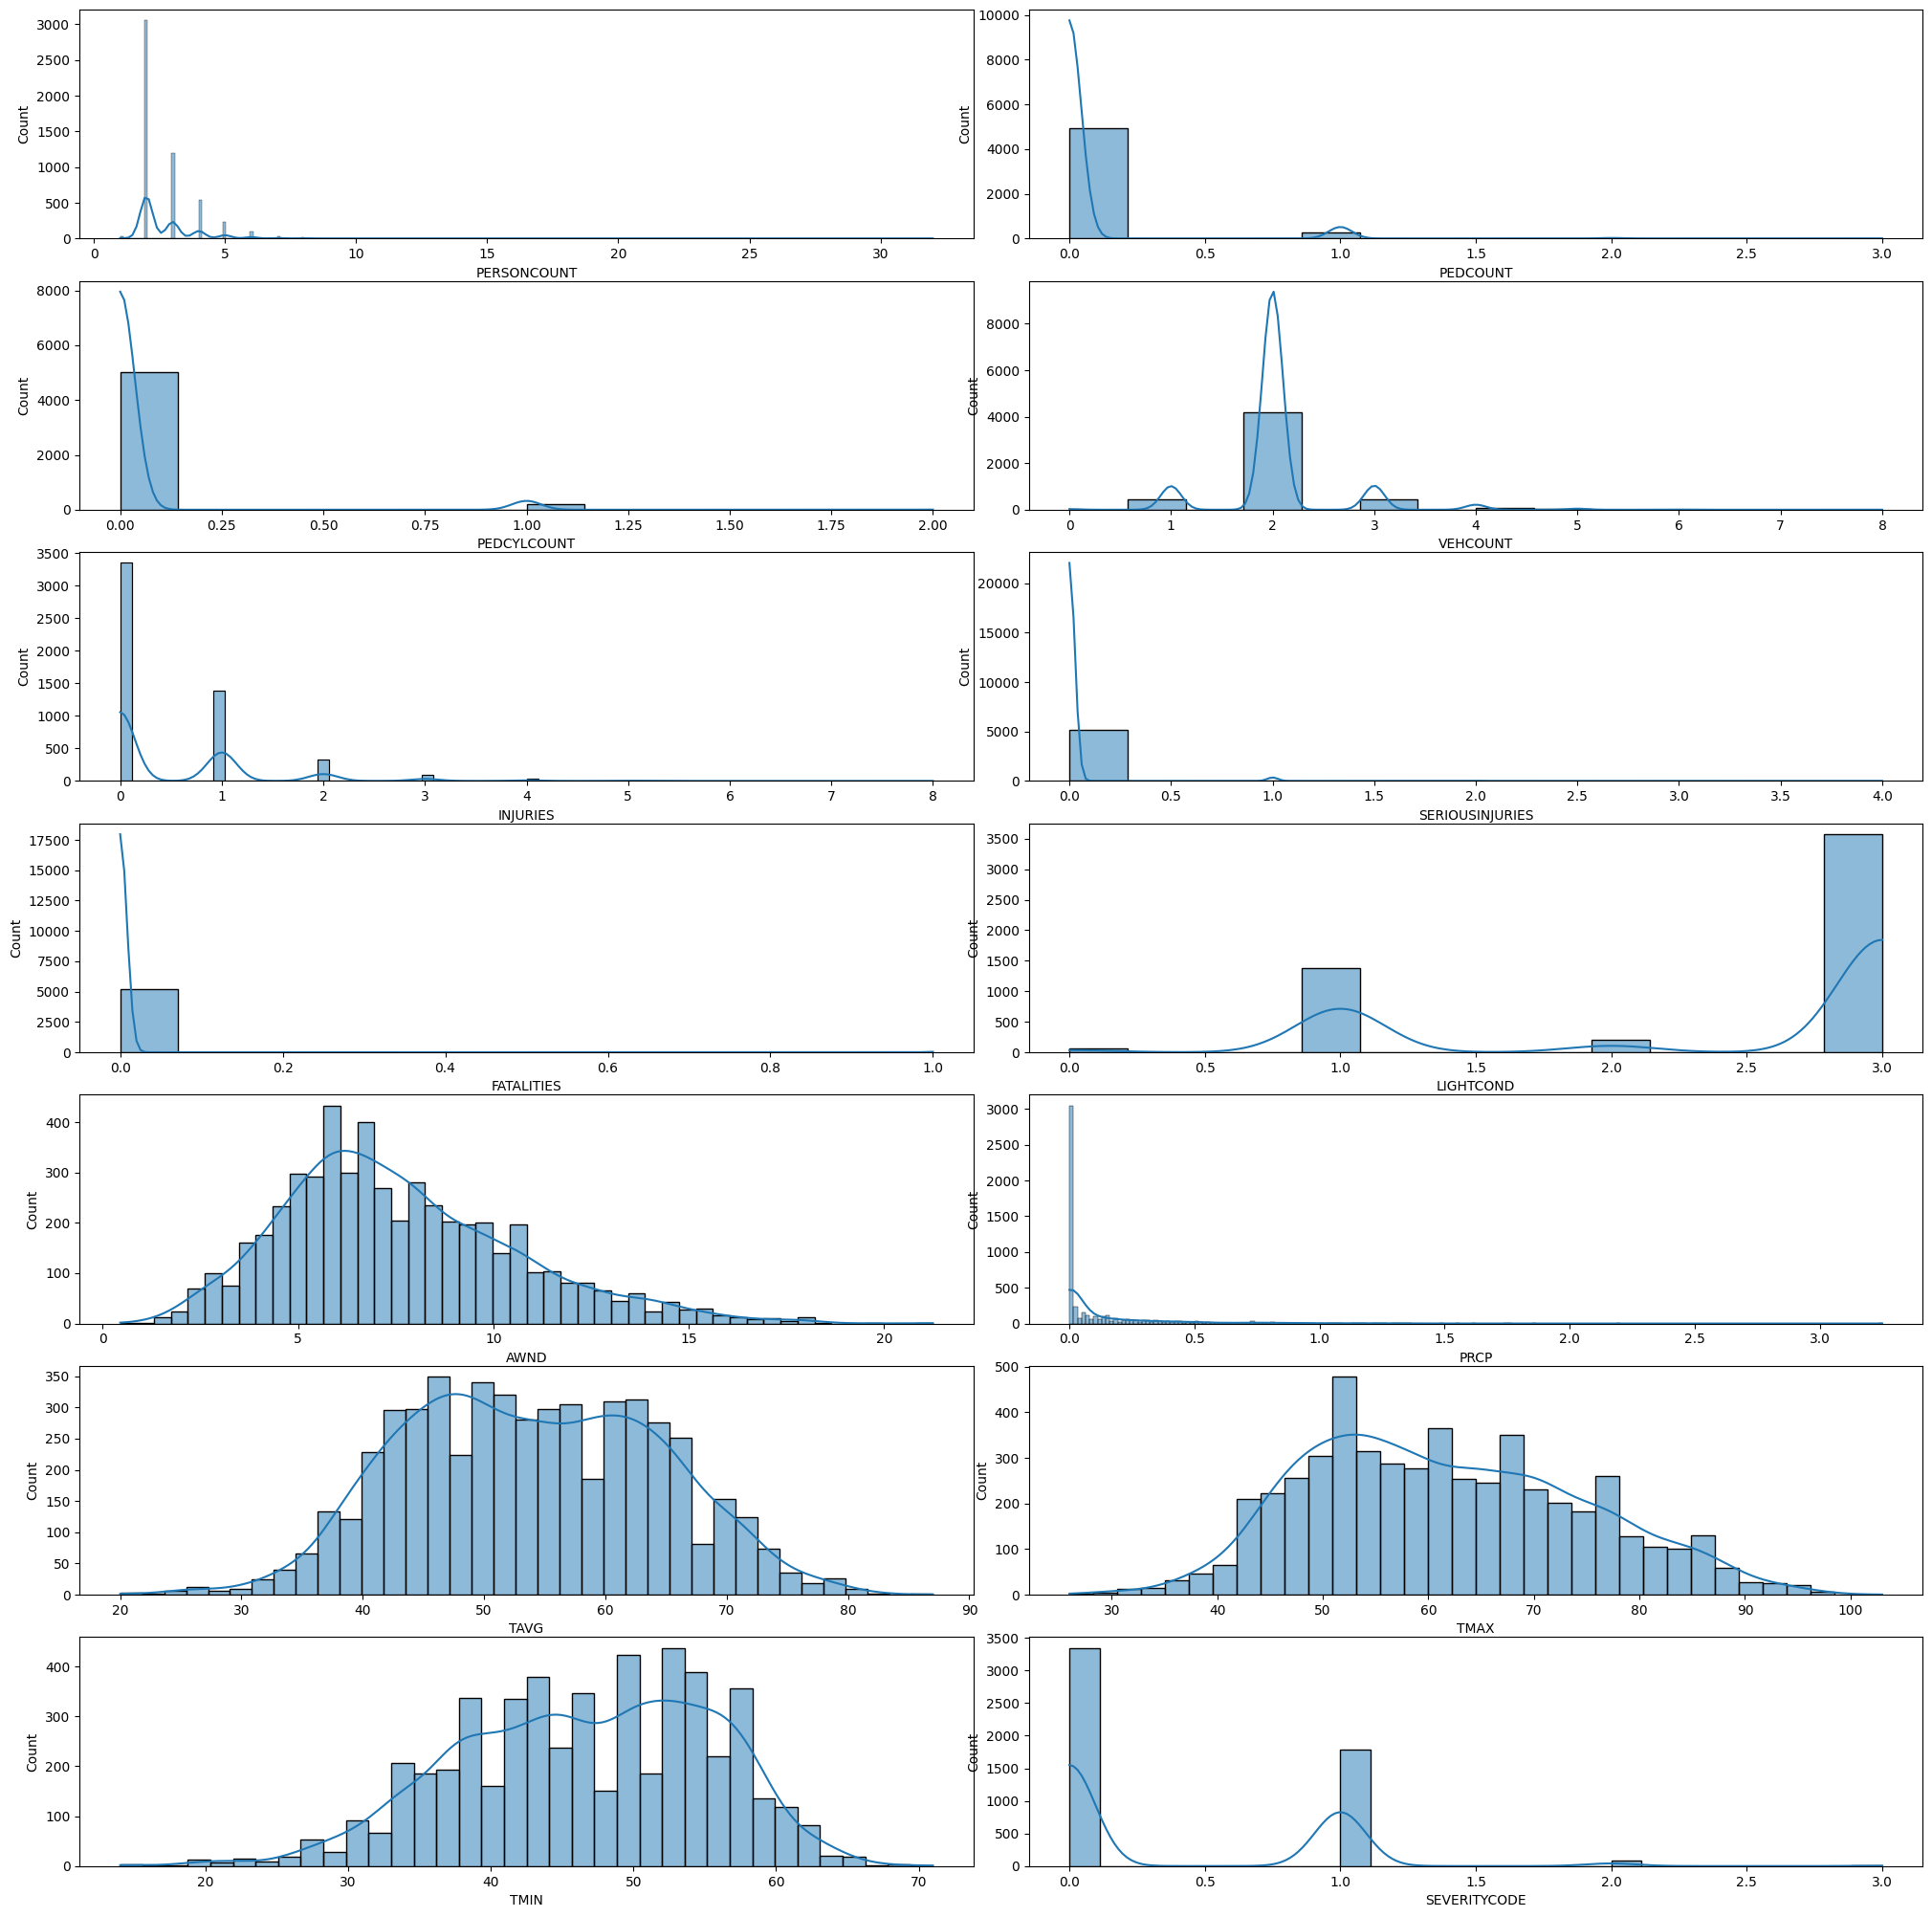

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(20, 20))
fig.tight_layout()

num_columns = train.select_dtypes(include=['float64', 'int64'])

for i in range(0, len(num_columns.columns)):
    sns.histplot(train, x=train[num_columns.columns[i]], kde=True, ax=axes[int(i/2), i%2])

#Insight
* Number of vehicles are overwhelmingly in 2 vehichle accidents
* Collisions tend to occur on windy days of average speed of(5-10 miles per hour)


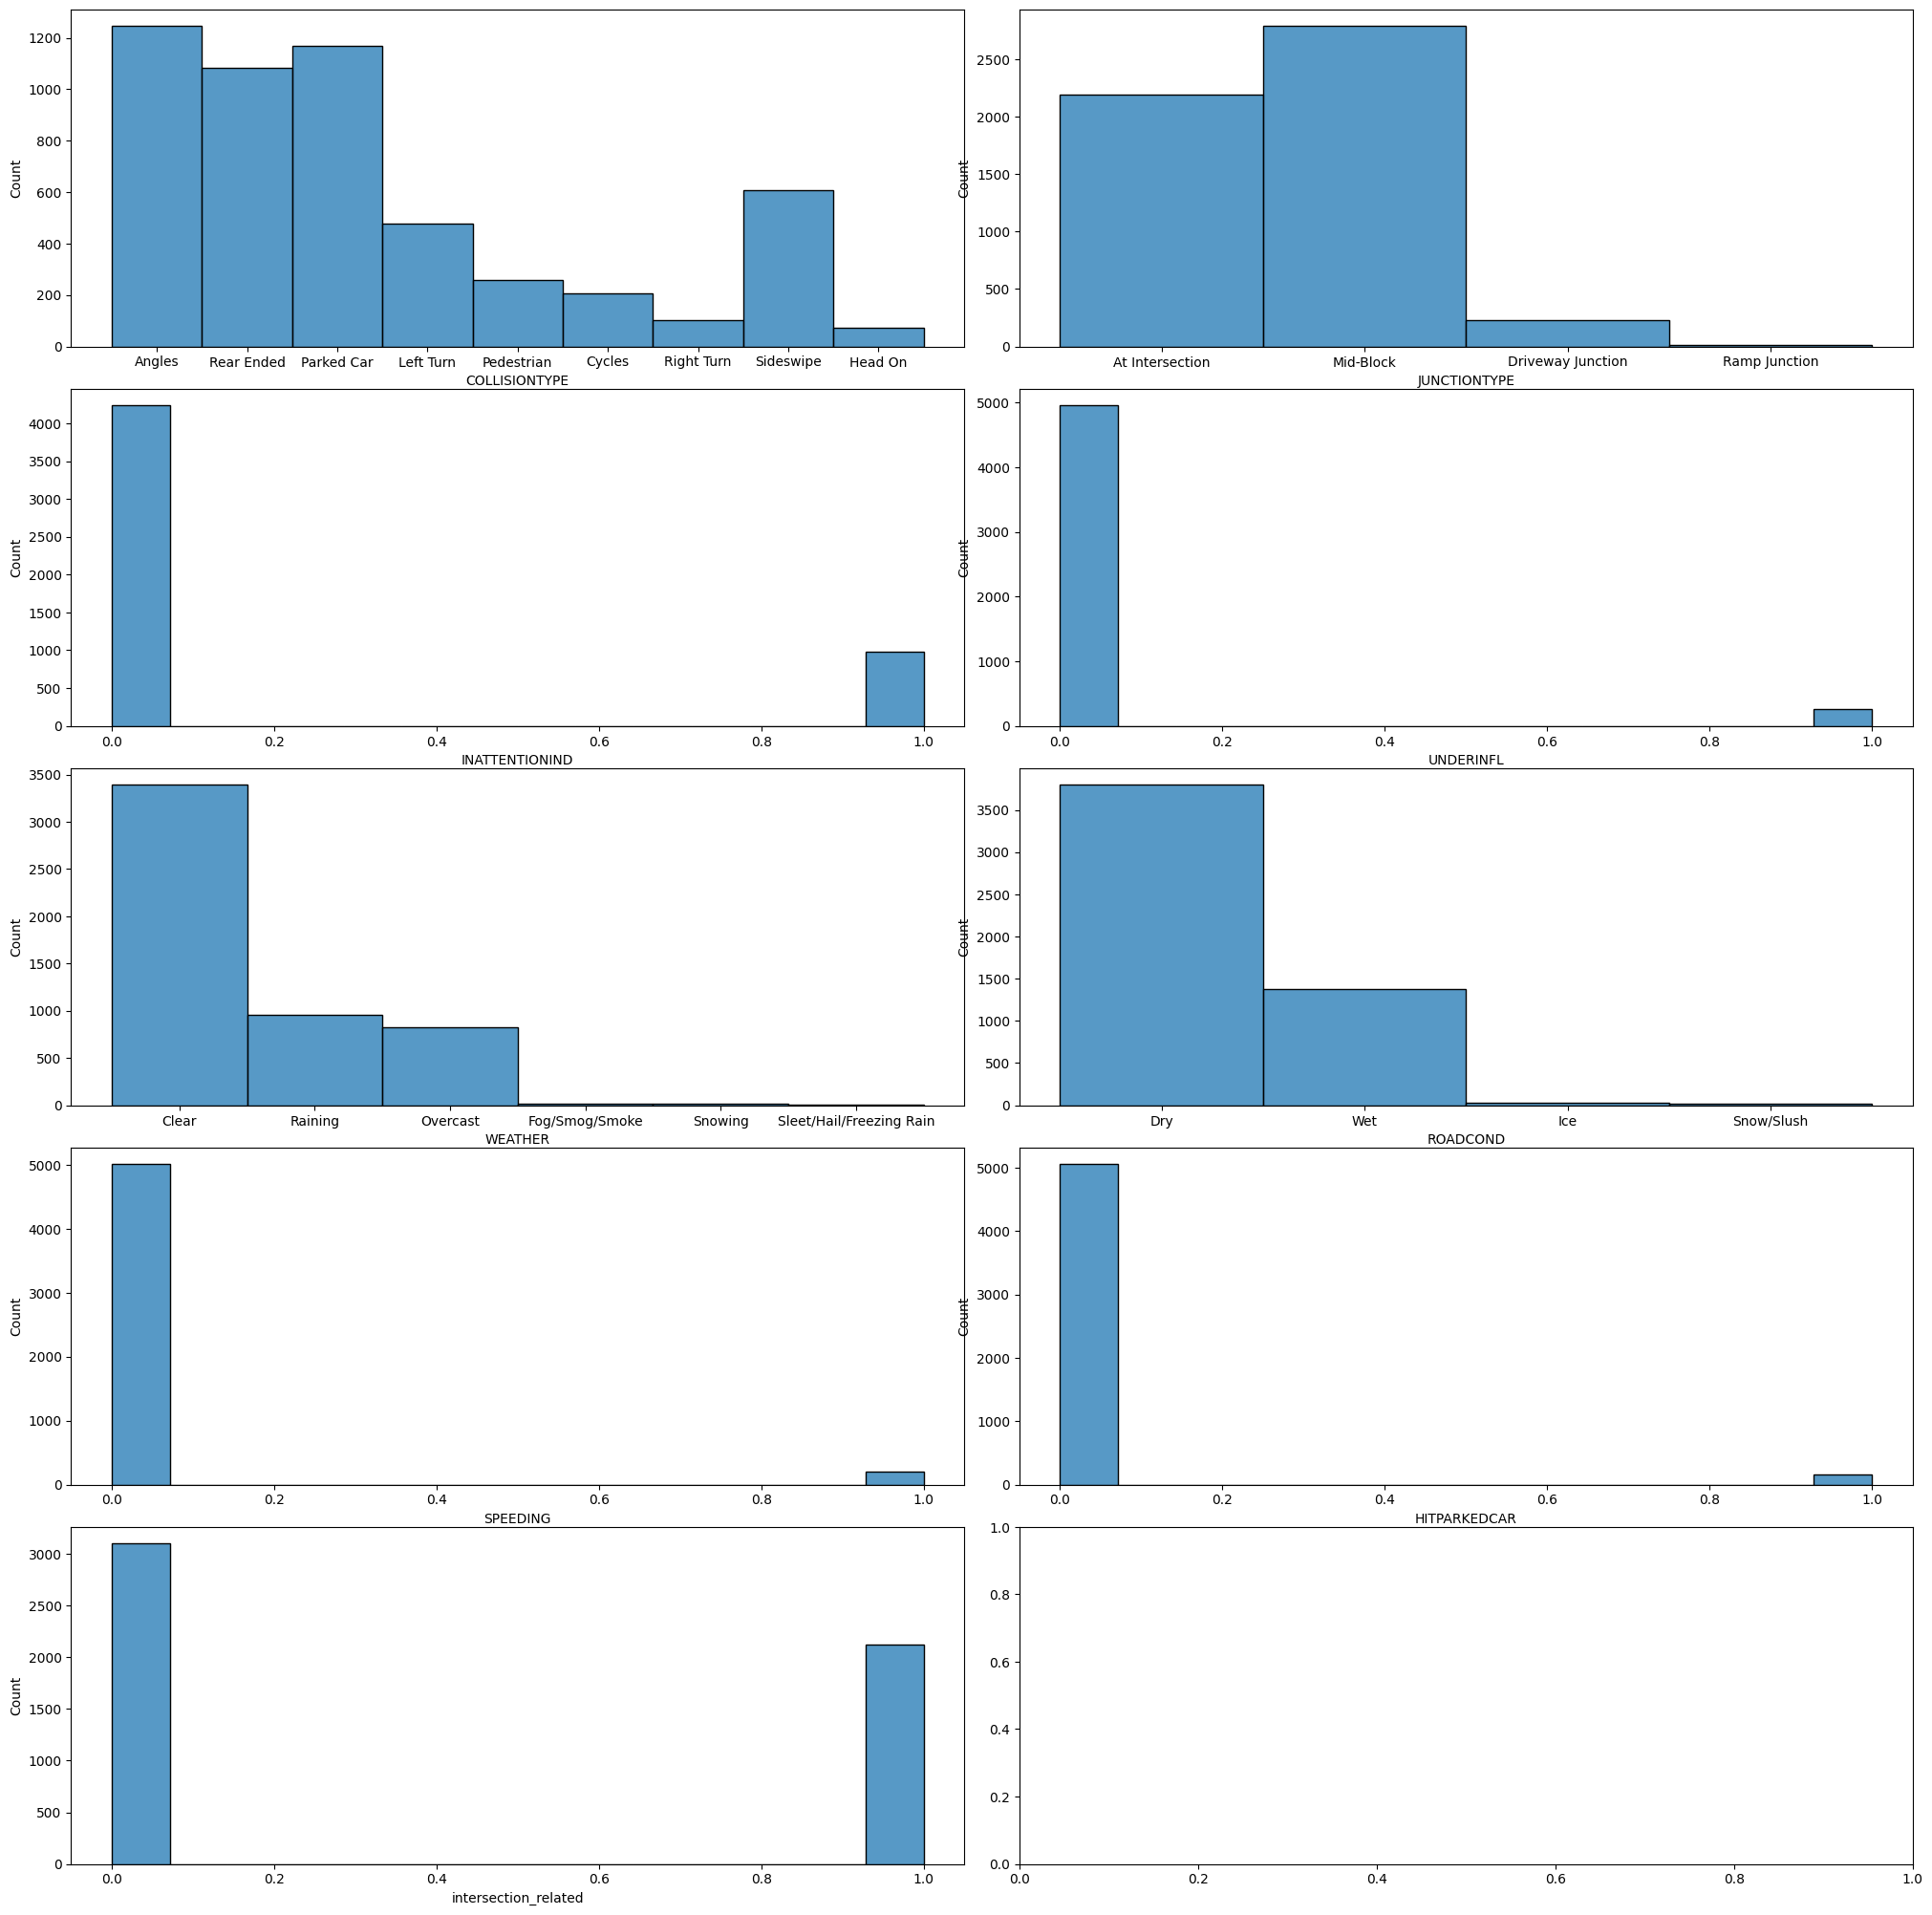

In [29]:
non_num_columns = ['COLLISIONTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'SPEEDING', 'HITPARKEDCAR', 'intersection_related']

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20, 20))
fig.tight_layout()

for i in range(0, len(non_num_columns)):
    sns.histplot(train, x=train[non_num_columns[i]], kde=False, ax=axes[int(i/2), i%2])

### Insights
* We observe that most accidents are being caused due to collisions due to cars(Angles,Rear Ended,Parked Car)
* Most accidents were at Intersections and Mid-Block
* Most accidents in Clear weathers and dry roads


## Feature Engineering

In [65]:
train[["INATTENTIONIND", "UNDERINFL", "SPEEDING", "HITPARKEDCAR"]] = train[["INATTENTIONIND", "UNDERINFL", "SPEEDING", "HITPARKEDCAR"]].astype('int64')

In [ ]:
# num_colums = train2.select_dtypes(include=['float64', 'int64'])

In [ ]:
#train = train.drop(train.loc[:, "AWND":"TMIN"],axis=1)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78317 entries, 0 to 78316
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COLLISIONTYPE         78317 non-null  object 
 1   PERSONCOUNT           78317 non-null  int64  
 2   PEDCOUNT              78317 non-null  int64  
 3   PEDCYLCOUNT           78317 non-null  int64  
 4   VEHCOUNT              78317 non-null  int64  
 5   INJURIES              78317 non-null  int64  
 6   SERIOUSINJURIES       78317 non-null  int64  
 7   FATALITIES            78317 non-null  int64  
 8   JUNCTIONTYPE          78317 non-null  object 
 9   INATTENTIONIND        78317 non-null  int64  
 10  UNDERINFL             78317 non-null  int64  
 11  WEATHER               78317 non-null  object 
 12  ROADCOND              78317 non-null  object 
 13  LIGHTCOND             78317 non-null  int64  
 14  SPEEDING              78317 non-null  int64  
 15  HITPARKEDCAR       

Let us look at the object dtypes

In [67]:

obj_columns = train.select_dtypes(include=['object']).columns
train[obj_columns]

,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND
0,Angles,At Intersection,Clear,Dry
1,Rear Ended,Mid-Block,Raining,Wet
2,Rear Ended,Mid-Block,Overcast,Dry
3,Parked Car,Mid-Block,Clear,Dry
4,Left Turn,At Intersection,Overcast,Dry
...,...,...,...,...
78312,Angles,At Intersection,Clear,Dry
78313,Rear Ended,Mid-Block,Clear,Dry
78314,Rear Ended,Mid-Block,Clear,Dry
78315,Sideswipe,Mid-Block,Clear,Dry



### Insight:
* We can already see whether the accident is intersection related from the JUNCTIONTYPE. So, the intersection_related column is redundant and Thus, we can drop it

In [105]:
train = train.drop(["intersection_related"], axis=1)
train.info()

KeyError: "['intersection_related'] not found in axis"

Now we shall convert the object dtypes into vectors with the help of encoding techniques.
Here, there does not exist an order. Thus, we'll use One Hot Encoding

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
num_column = train.select_dtypes(include = ['float64', 'int64']).columns
(train.loc[:, num_column].corr()["SEVERITYCODE"])

PERSONCOUNT        0.098874
PEDCOUNT           0.302246
PEDCYLCOUNT        0.232122
VEHCOUNT          -0.158603
INJURIES           0.786873
SERIOUSINJURIES    0.392526
FATALITIES         0.206616
INATTENTIONIND     0.006503
UNDERINFL          0.053380
LIGHTCOND          0.021037
SPEEDING           0.049135
HITPARKEDCAR      -0.105203
AWND              -0.006927
PRCP               0.001983
TAVG               0.025402
TMAX               0.025497
TMIN               0.025370
SEVERITYCODE       1.000000
Name: SEVERITYCODE, dtype: float64

In [71]:
change_column = ["COLLISIONTYPE", 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND']
enc = OneHotEncoder()
enc.fit(train[change_column])

OneHotEncoder()

In [72]:
transformed = enc.transform(train[["COLLISIONTYPE", 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND']])
categories = np.concatenate((enc.categories_[0], enc.categories_[1], enc.categories_[2], enc.categories_[3]))
len(categories)

28

In [73]:
train[categories] = transformed.toarray()
train.sample(5)

,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,INATTENTIONIND,...,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
38127,Sideswipe,3,0,0,2,0,0,0,At Intersection,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22631,Parked Car,2,0,0,2,0,0,0,Mid-Block,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
74745,Sideswipe,2,0,0,2,0,0,0,Mid-Block,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29334,Left Turn,3,0,0,2,1,0,0,At Intersection,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39418,Parked Car,2,0,0,2,0,0,0,Mid-Block,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78317 entries, 0 to 78316
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COLLISIONTYPE             78317 non-null  object 
 1   PERSONCOUNT               78317 non-null  int64  
 2   PEDCOUNT                  78317 non-null  int64  
 3   PEDCYLCOUNT               78317 non-null  int64  
 4   VEHCOUNT                  78317 non-null  int64  
 5   INJURIES                  78317 non-null  int64  
 6   SERIOUSINJURIES           78317 non-null  int64  
 7   FATALITIES                78317 non-null  int64  
 8   JUNCTIONTYPE              78317 non-null  object 
 9   INATTENTIONIND            78317 non-null  int64  
 10  UNDERINFL                 78317 non-null  int64  
 11  WEATHER                   78317 non-null  object 
 12  ROADCOND                  78317 non-null  object 
 13  LIGHTCOND                 78317 non-null  int64  
 14  SPEEDI

### Multivariate Data Analysis with Heatmap

<ipython-input-79-10f570841e6b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, linewidths=.5, ax=ax)


<Axes: >

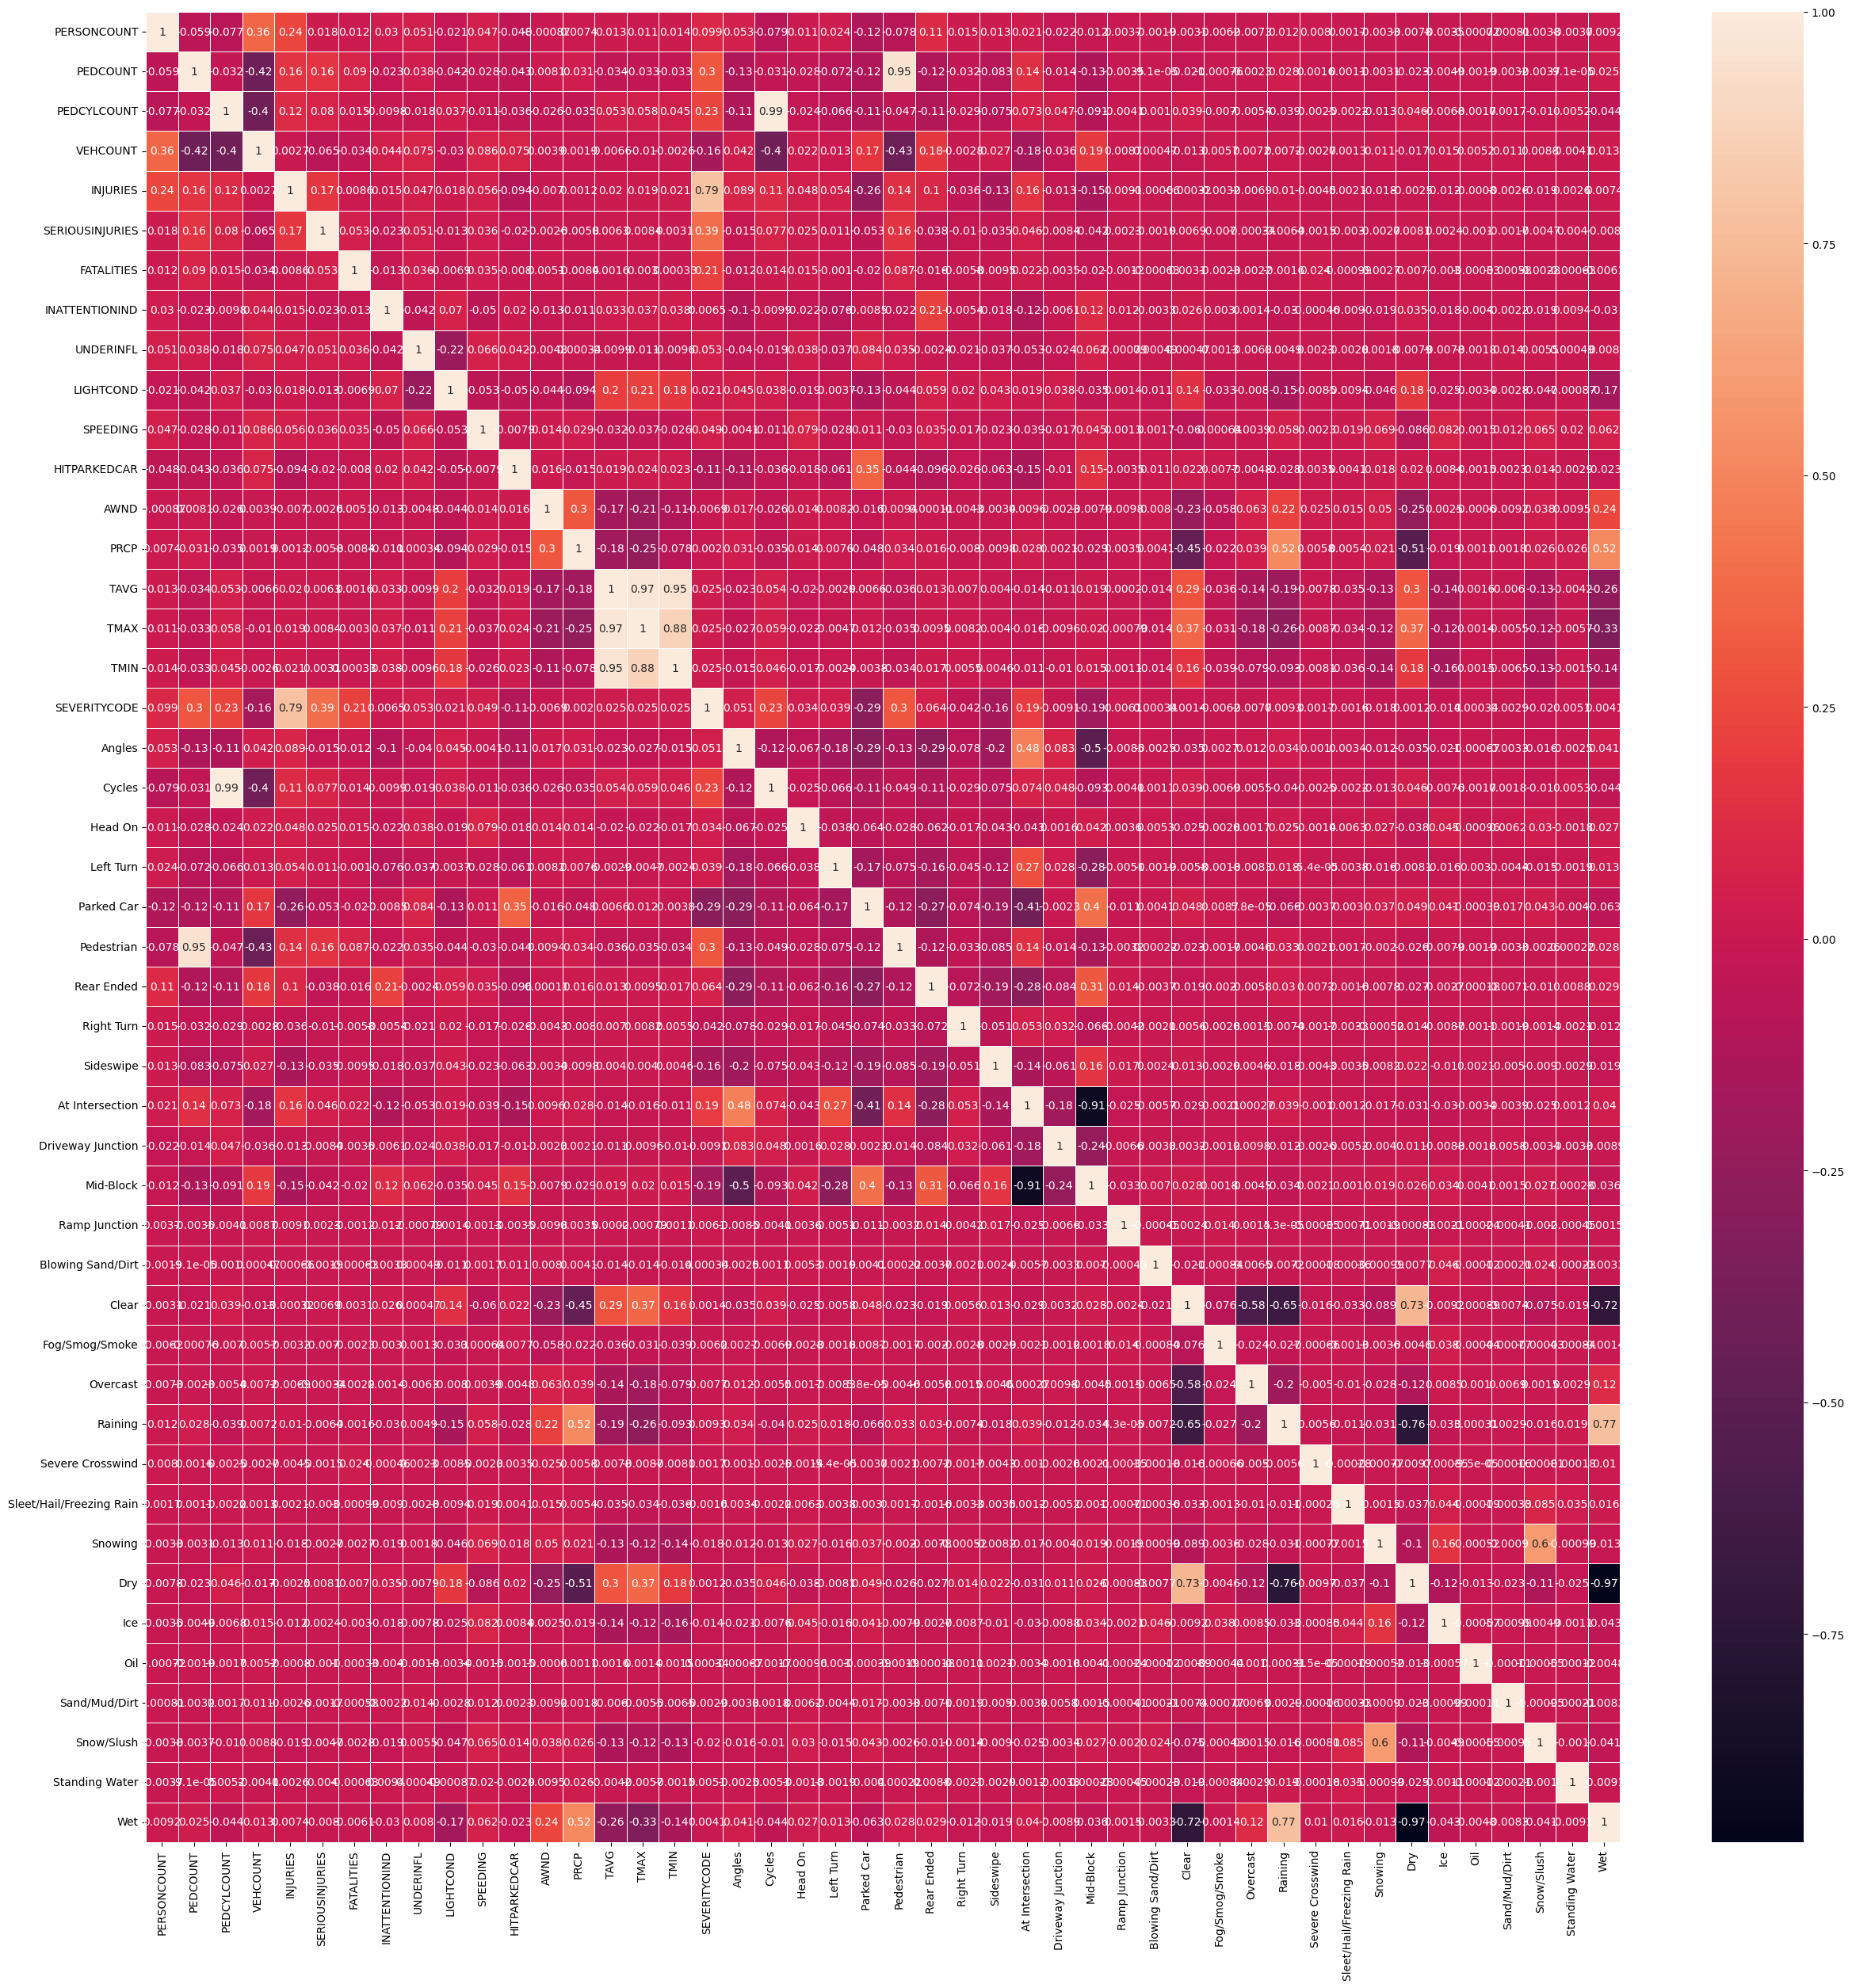

In [79]:
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches
sns.heatmap(train.corr(), annot=True, linewidths=.5, ax=ax)

<ipython-input-88-1af88a0d5c89>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(train.corr()["SEVERITYCODE"]), annot=True, linewidths=.5)


<Axes: >

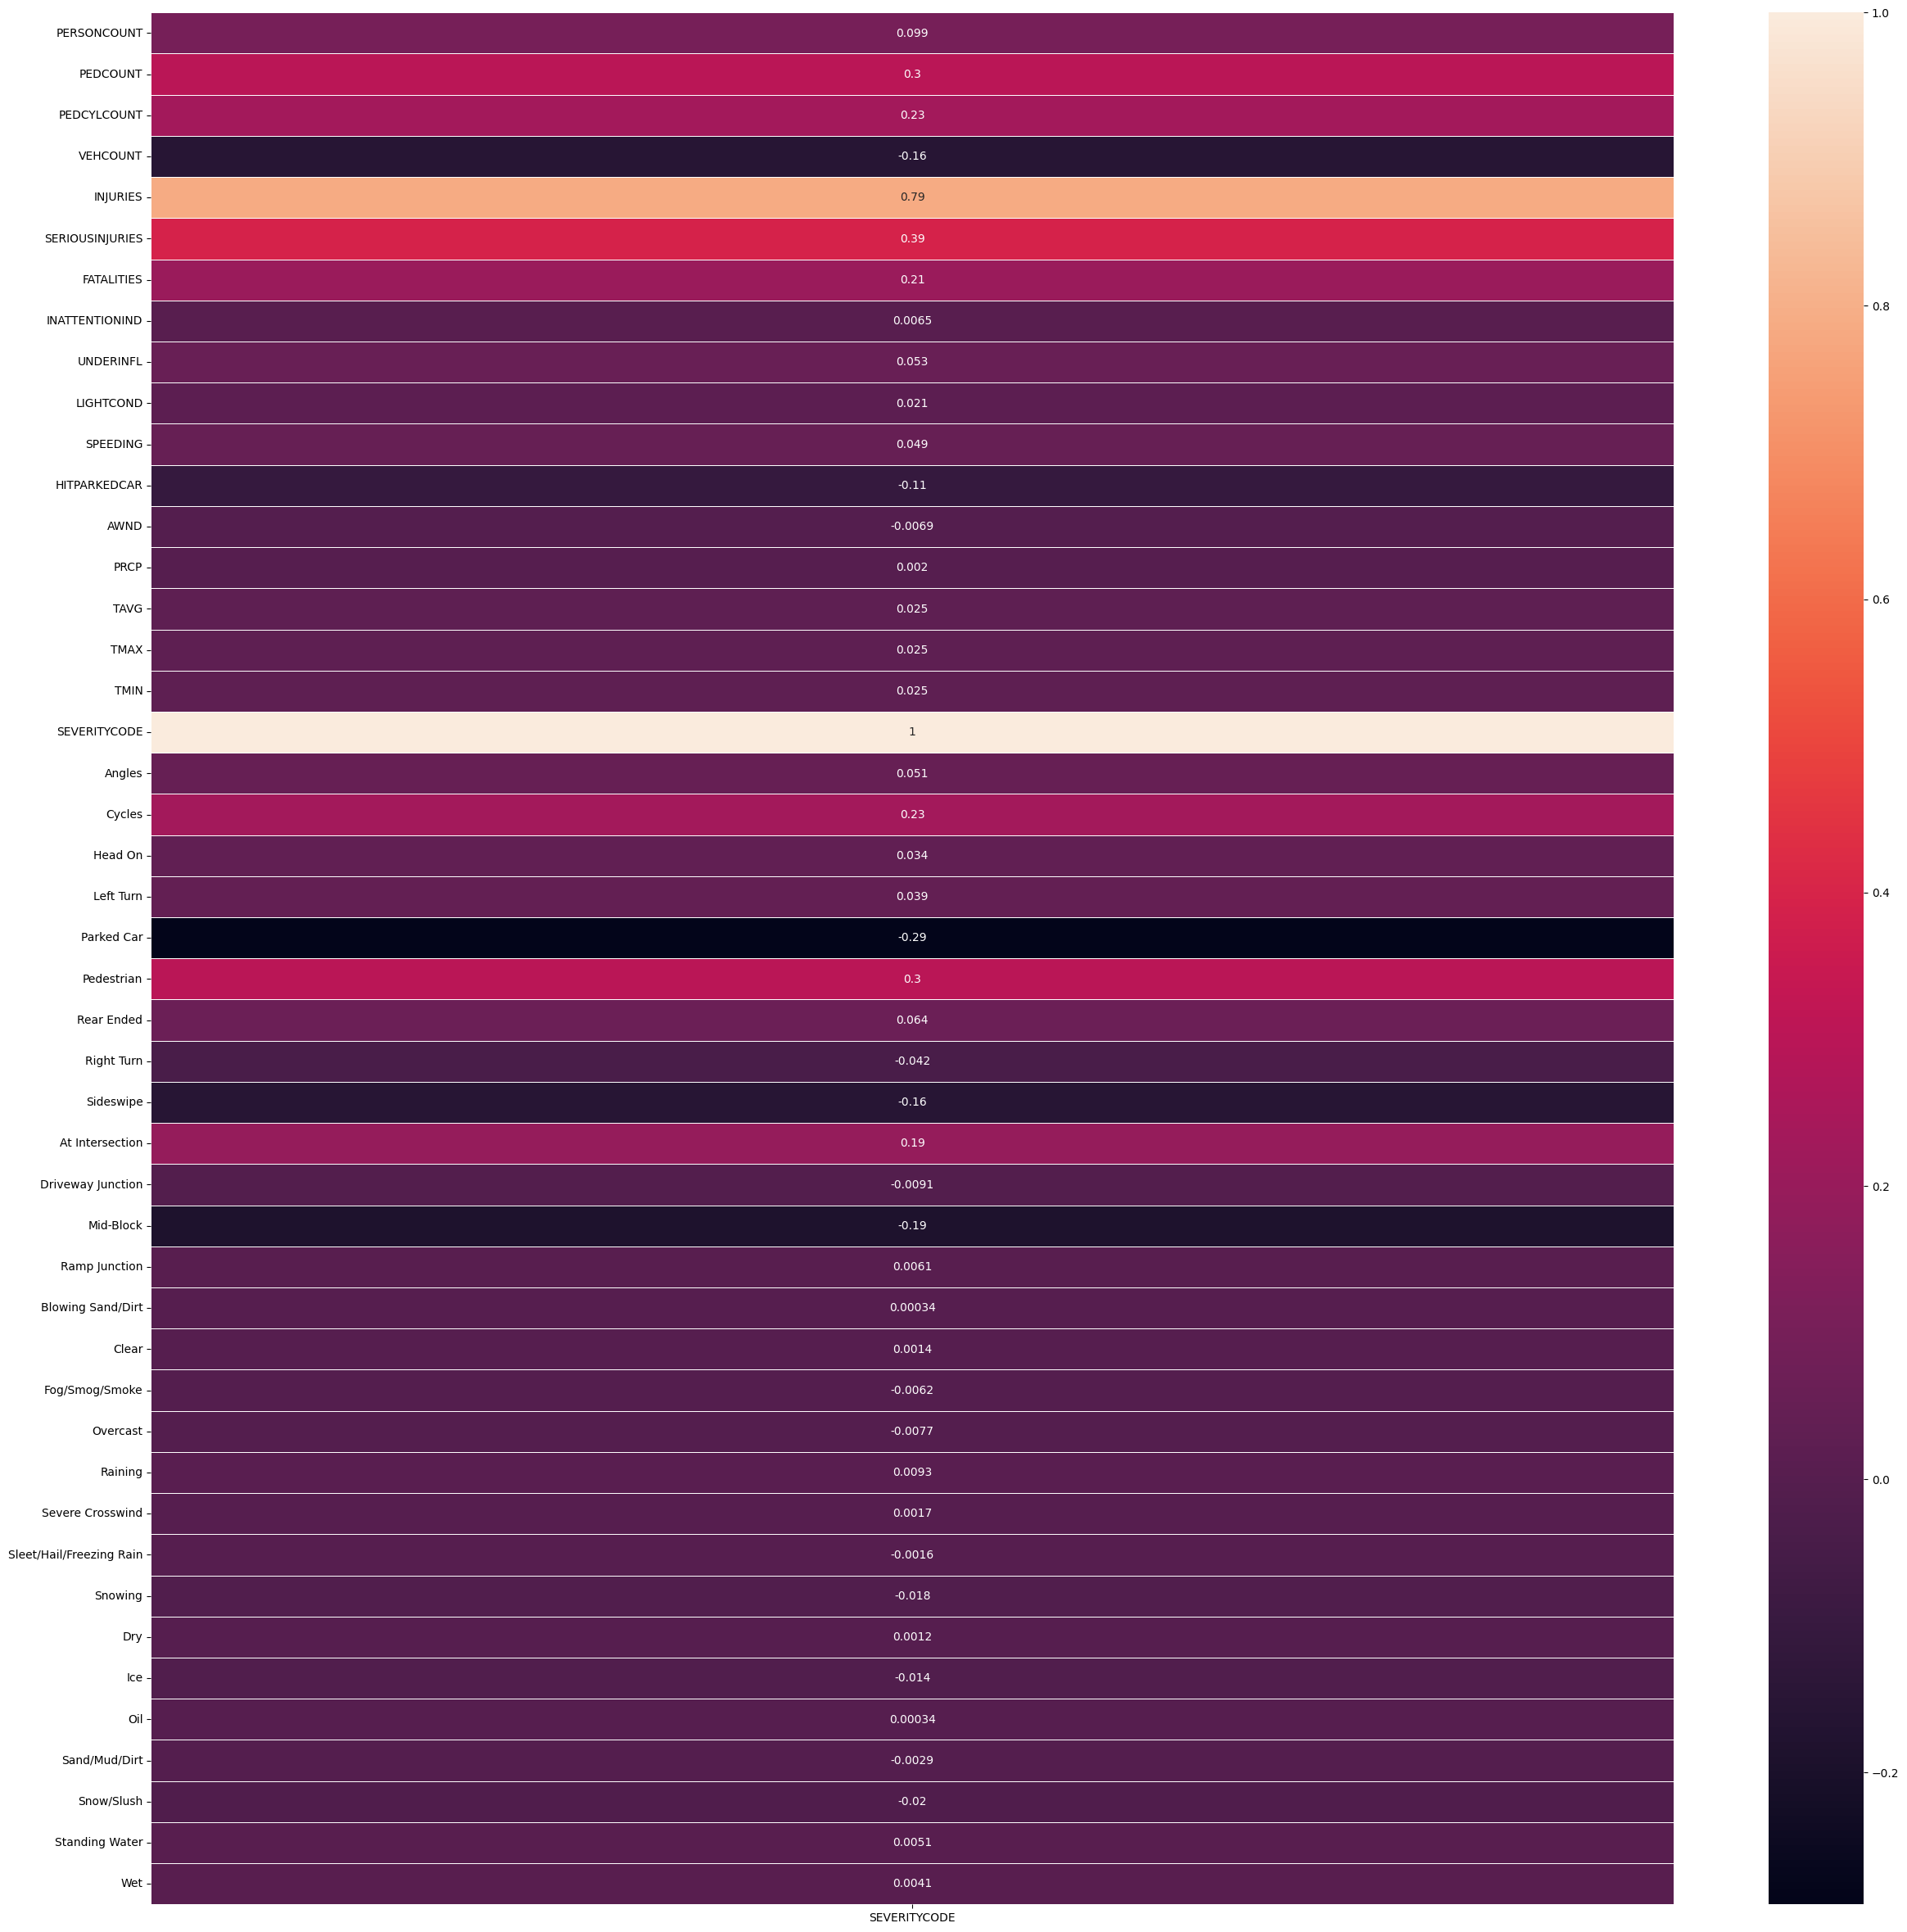

In [88]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(pd.DataFrame(train.corr()["SEVERITYCODE"]), annot=True, linewidths=.5)

#Insights
* The most impactful aspects of the data are injuries,severe injuries and fatalities to our severity index
* number of pedestrians, number of cycles, vehicle count and injuries tend to have some of the higher correlation with severity index


#### Let us take those whose absolute correlation value >= 0.7 to be significant

In [90]:
relevant_cols = ["PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES", "HITPARKEDCAR", "Cycles", "Parked Car", "Pedestrian", "Sideswipe", "At Intersection", "Mid-Block"]

In [92]:
X = train[relevant_cols]
Y = train["SEVERITYCODE"]

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.25)

## Model Creation

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [97]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=200), GradientBoostingClassifier(n_estimators=200), KNeighborsClassifier(n_neighbors = int(np.sqrt(X.shape[0])))]

In [100]:
for model in models:
  model.fit(train_X, train_Y)
  pred = model.predict(test_X)
  print("Accuracy Score: ", accuracy_score(test_Y, pred), " Cross Val Score: ", (cross_val_score(model, train_X, train_Y, cv=5)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy Score:  0.9999489274770174  Cross Val Score:  [0.99974464 1.         0.99991487 0.99982974 1.        ]
Accuracy Score:  1.0  Cross Val Score:  [1.         1.         1.         0.99991487 1.        ]
Accuracy Score:  1.0  Cross Val Score:  [1.         1.         0.99991487 0.99974462 0.99991487]
Accuracy Score:  1.0  Cross Val Score:  [1.         1.         1.         0.99991487 1.        ]
Accuracy Score:  0.9762002042900919  Cross Val Score:  [0.97327205 0.97276132 0.97429131 0.97012003 0.96909849]


## GradientBoostingClassifier seems to be the best choice

In [102]:
model = GradientBoostingClassifier(n_estimators=200)
model.fit(X, Y)

GradientBoostingClassifier(n_estimators=200)

In [103]:
test_df = pd.read_csv("test.csv")
test_df.head()

,Unnamed: 0.1,Unnamed: 0,longitude,latitude,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,response_type,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5
0,67915,67916,-122.346179,47.703847,Head On,2,0,0,2,0,...,NaN,NaN,8.95,0.15,0.0,0.0,62.0,68,55,29.1
1,22738,22739,-122.350784,47.613079,Parked Car,2,0,0,2,0,...,NaN,NaN,7.83,0.00,NaN,NaN,43.0,51,35,21.0
2,13897,13898,-122.312630,47.623909,Parked Car,2,0,0,2,0,...,Motor Vehicle Accident,11.0,8.28,0.54,NaN,NaN,43.5,47,40,25.9
3,24279,24280,-122.347107,47.630123,Sideswipe,2,0,0,2,0,...,NaN,NaN,4.25,0.00,NaN,NaN,57.5,66,49,14.1
4,59239,59240,-122.346309,47.733984,Angles,2,0,0,2,2,...,NaN,NaN,6.26,0.00,0.0,0.0,51.0,64,39,23.9


In [104]:
test_df = test_df.drop(drop_column, axis = 1)

In [ ]:
test_df[["INATTENTIONIND", "UNDERINFL", "SPEEDING", "HITPARKEDCAR"]] = test_df[["INATTENTIONIND", "UNDERINFL", "SPEEDING", "HITPARKEDCAR"]].astype('int64')

In [106]:
test_df = test_df.drop(["intersection_related"], axis=1)

In [107]:
transformed_test = enc.transform(test_df[["COLLISIONTYPE", 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND']])
test_df[categories] = transformed_test.toarray()

In [109]:
predictions_test = model.predict(test_df[relevant_cols])
predictions_test

array([0, 0, 0, ..., 1, 2, 0])

In [110]:
predictions_df = pd.DataFrame(predictions_test, columns = ['y'])
predictions_df.to_csv("ranchos_predictions.csv")